# Introduction

This worksheet covers the three supervised learning algorithms we look at: k-nearest neighbours, linear regression, and the naive Bayes classifier. Similar to the previous worksheet, you will do some work implementing your own versions of these algorithms, to ensure that you understand the details of them. You will also compare them with the implementations in scikit-learn to test your implementations.

# Preliminaries
Import key packages: NumPy, matplotlib, and any others that you prefer to work with. In general, when writing code, you will put all your import statements at the top. However, for these worksheets we will import as we go along.

In [4]:
#TODO: import NumPy and matplotlib here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1: k-nearest neighbours classification
In this question we will use the k-nearest neighbours algorithm to make predictions on the breast cancer Wisconsin dataset. This is a classification problem where the aim is to classify instances as either being malignant or benign based on the following 10 features:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter squared/ area −1)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (‘coastline approximation’ −1)

In this question you will:
    (a) download the dataset from sklearn and store the data and targets in suitable variables, 
    (b) separate your data into a training and test split, 
    (c) (Optional) write your own function to implement k-nearest neighbours, 
    (d) (Optional) check your implementation with that of sklearn. 
    (e) select the most appropriate value of $k$ using cross-validation.

## Part (a)
Import the package `datasets` from `sklearn` and then load the breast cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`. 
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?

In [7]:
# Import suitable packages, load the dataset, and save data and targets into variables X and Y
# import packages
from sklearn import datasets

all_data = datasets.load_breast_cancer()
X = all_data.data
Y = all_data.target
print(X.shape, Y.shape)
print(Y[0:10])  # 分类

(569, 30) (569,)
[0 0 0 0 0 0 0 0 0 0]


## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [9]:
# Import the package train_test_split from sklearn.model_selection.
# Split the dataset into Xtr, Xtest, Ytr, Ytest. Xtest and Ytest will form your held-out
# test set. You will later split Xtr and Ytr into training and validation sets.
from sklearn.model_selection import train_test_split
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size = 0.2, random_state=10)

## (Optional) Part (c) 
Recall from the lecture that the k-nearest neighbours algorithm runs as follows:

Training step: Simply store the dataset

Prediction step: Given a datapoint $\vec{x}$:
 - **Find** the $k$ datapoints $(\vec{x}_i, y_i)$ where the distance from $\vec{x}$ to $\vec{x}_i$ is smallest
 - **Return** the majority class from the $y_i$
   
 
What, if anything, do you need to do for the training step?

Write function(s) to implement the k-nearest neighbours prediction step. You may wish to break the procedure down into two functions `predict_datapoint` that makes a prediction for one datapoint and `predict_data` that loops over the whole dataset.

To select the majority class from the nearest neighbours, you can use the function `scipy.stats.mode()`


In [11]:
from scipy.stats import mode
# Write function(s) to implement the prediction step in k-nearest neighbours. 
# You can use the suggested structure below if desired.


# predict_datapoint takes 4 arguments. pt (type: numpy array) is the datapoint we are making a prediction about, 
# Xtrain and Ytrain (numpy arrays) are training data and targets, k (int) is the number of neighbours.
# Returns an integer which is the predicted class for pt
def predict_datapoint(pt, Xtrain, Ytrain, k):
    # For each datapoint in Xtrain, calculate the distance to pt and store
    ##TODO##
        
    # Sort the list of distances (hint: use np.argsort)
    ##TODO##
    
    # obtain the classes (in Ytrain) of the datapoints with the smallest distance to pt
    ##TODO##
    
    # return the mode of the classes
    ##TODO##
    pass

# predict_data takes 4 arguments: the test data Xtst (numpy array), the training data Xtrain (numpy array),
# the training targets Ytrain (numpy array), and the number of neighbours k (int, default = 3). 
# Returns: predictions (array of int) for each point in Xtst
def predict_data(Xtst, Xtrain, Ytrain, k=3):
    #Loop over the datapoints in Xtst and store the prediction for that datapoint
    ##TODO##
    # Return the predictions
    ##TODO##
    pass
# Predict values for the TRAINING data (we will not look at the test set yet)
##TODO##

## Part (d)
Now we can compare your implementation with the sklearn implementation (you should get the same results). Firstly import the classfifier `KNeighborsClassifier` from `sklearn.neighbors`. Instantiate the classifier with the same number of neighbours that you used previously. Fit the model and make a prediction on the test set.

In [13]:
# Import KNeighborClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the classifier with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors = 3)

#Fit the classifier on the training data
knn_model.fit(Xtr, Ytr)

#Make a prediction on the training data
predict_train = knn_model.predict(Xtr)

Check whether your predictions are the same as the predictions from `KNeighborsClassifier`.

In [15]:
##TODO##
#

Use the built in metrics in sklearn to calculate the accuracy of your classifier on the TRAINING set.

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
accuracy_score(Ytr, predict_train)

0.9560439560439561

## Part(e) Using cross-validation for model selection
k-nearest neighbours has the parameter $k$, and we need to decide which is the best value of $k$ to use. Last week we talked about using cross-validation for model selection.

We will use cross-validation on our training set to select the best value of $k$, in a range from 1 to 30.

NB: use sklearn's version of k-NN rather than yours, since unless you have optimised yours it is probably too slow.

Since we are using cross-validation for model selection we will cross-validate on the training set only.

Procedure:
        
 1. Import `KFold` from `sklearn.model_selection`  
 1. Instantiate `KFold` with 5 splits. Set the parameter `random_state` to help you reproduce your results if needed.
 1. Set a variable `max_k` to 30  
 1. Inititalise two variables to store the training accuracies and validation accuracies (these need to store max_k\*5 accuracies)  
 1. Loop over the values of k:  
    1. Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k  
    1. Loop over the cross-validation splits:  
       1. fit the model on the current split of data  
       1. make predictions  
       1. calculate training and validation accuracy and store  
 6. Calculate the mean training and validation accuracies across splits for each $k$

Plot the mean training and validation accuracies. Which value of $k$ will you use? Why?
    

In [19]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=68, shuffle=True)
max_k = 30
train_accuracies = [[] for _ in range(max_k)]
val_accuracies = [[] for _ in range(max_k)]

for k in range(max_k):
    knn_model = KNeighborsClassifier(n_neighbors = k+1)
    
    for train_index, val_index in kf.split(Xtr):
        Xtrain, Xval = Xtr[train_index], Xtr[val_index]
        ytrain, yval = Ytr[train_index], Ytr[val_index]
    
        # fit the model on the current split of data 
        knn_model.fit(Xtrain, ytrain)
        
        # make predictions 
        pred_train = knn_model.predict(Xtrain)
        pred_val = knn_model.predict(Xval)
        
        # calculate training and validation accuracy and store 
        train_accuracies[k].append(accuracy_score(ytrain, pred_train))
        val_accuracies[k].append(accuracy_score(yval, pred_val))
        
# Calculate the mean training and validation accuracies across splits for each 𝑘
train_accuracy_mean = np.mean(train_accuracies, axis=1) 
train_accuracy_stdev = np.sqrt(np.mean((train_accuracies - train_accuracy_mean[:, np.newaxis])**2, axis=1))
val_accuracy_mean = np.mean(val_accuracies, axis=1)
val_accuracy_stdev = np.sqrt(np.mean((val_accuracies - val_accuracy_mean[:, np.newaxis])**2, axis=1))
# train_accuracy_mean

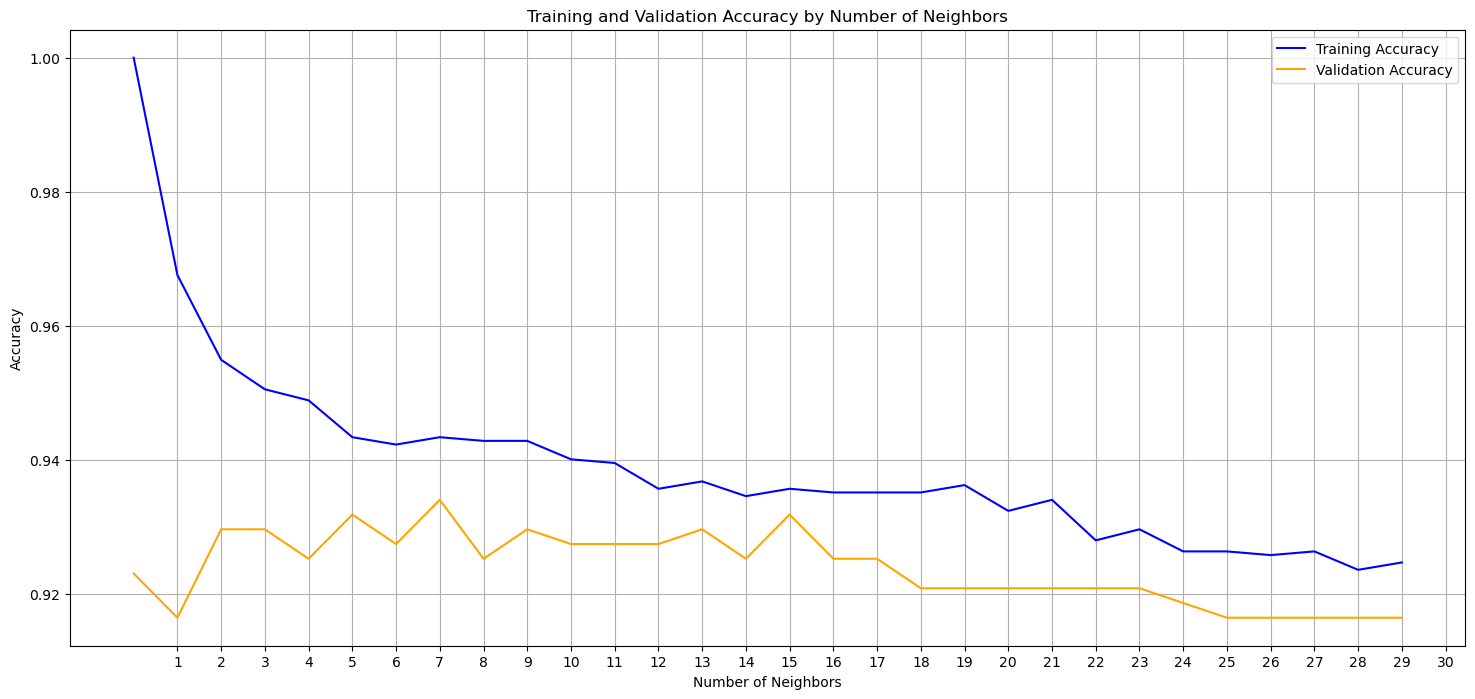

In [20]:
# Plot the mean training and validation accuracies against each value of k. Which value of 𝑘 will you use? Why?
max_k = 30

plt.figure(figsize=(18, 8))
plt.plot(train_accuracy_mean, label = "Training Accuracy", color = "blue")
plt.plot(val_accuracy_mean, label = "Validation Accuracy", color = "orange")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy by Number of Neighbors")
plt.xticks(np.arange(1, 31, 1)) 
plt.grid(True)
plt.show()

# 7

# The naive Bayes classifier

Recall from the lecture notes that the naive Bayes classifier works as follows. We are trying to approximate an unknown function $$f:V \rightarrow \mathcal{O}$$
where $V$ is our feature space and our output space $\mathcal{O} = \{c_1, c_2, ... c_K\}$ is a finite set of classes.

The naive Bayes classifier does this by building a model that assigns the class label $\hat{y} = c_k$ as follows:
$$
\hat{y} = \text{argmax}_k p(c_k)\prod_i p(x_i| c_k)
$$
that is, the $k$ that maximises this quantity.

In practice, multiplying all the $p(x_i| c_k)$ together is going to give some very small values. Therefore, we take the log to make it easier to compute; this is a common trick, since, for positive arguments, the log is a monotonically increasing function the $\text{argmax}_x f(x)=\text{argmax}_x \log{f(x)}$.
                                \begin{align}
\hat{y} &= \text{argmax}_k p(c_k)\prod_i p(x_i| c_k)= \text{argmax}_k \log\left[p(c_k)\prod_i p(x_i| c_k)\right]\\
&=\text{argmax}_k \left[\log{p(c_k)} + \sum_i \log{p(x_i|c_k)}\right]
\end{align}

If we choose that $p(x_i|c_k)$ is given by a normal distribution with mean $\mu_k$ and variance $\sigma_k^2$, then we obtain the following expression:
\begin{align}
\hat{y} &= \text{argmax}_k \left[ \log{p(c_k)} + \sum_i \log{p(x_i|c_k)} \right] \\
&= \text{argmax}_k \left[ \log{p(c_k)} + \sum_i \log{\frac{1}{\sigma_k\sqrt{2\pi}}}\exp{\left( - \frac{(x_i-\mu_k)^2}{2\sigma_k^2}\right)} \right] \\
&= \text{argmax}_k \left[ \log{p(c_k)} - \sum_i \log{\left(\sigma_k\sqrt{2\pi}\right)} - \sum_i \frac{(x_i-\mu_k)^2}{2\sigma_k^2} \right] \quad \text{log-likelihood.}
\end{align}
Expressing the values in terms of these sums means that they do not get so small, and it is less likely that there will be errors at the machine precision level.


How do we implement this in practice? We assume that each probability $p(x_i| c_k)$ is given by some distribution, and then given a datapoint $\vec{x}$, we plug the value into the equation for the distribution.

In this question you will: 
    (a) (Optional) implement your own version of the Gaussian naive Bayes classifier, 
    (b) (Optional) check your classifier against the implementation in sci-kit learn, 
    (c) compare the accuracy of the scikit-learn naive Bayes classifier with the accuracy of the k-nearest neighbours classifier, and 
    (d) run cross-validation to verify whether the kNN classfier or the Gaussian naive Bayes classifier performs better on this dataset.

## (Optional) Part (a) Implementing Gaussian naive Bayes
For this question we will make the assumption that each feature is described by a normal (also called Gaussian) distribution. The procedure is as follows:
1. Divide the training data by class
2. Calculate mean and standard deviation per class and per feature
4. For each datapoint in the validation set, calculate the log-likelihood for each class and for each feature (Hint: use the function `scipy.stats.norm.logpdf`)
5. Combine these values together with the probability of the class according to the log-likelihood equation above
6. Choose the class with the highest value


## (Optional) Part (b) Checking results
We now compare our results with the sklearn implementation. 

## Part (c) Comparing k-nearest neighbours and Gaussian naive Bayes
Now, using the sklearn implementations of k-nearest neighbours and naive Bayes, retrain the naive Bayes classifier using the original training set `Xtr`, `Ytr`.
Also retrain the k-nearest neighbours classifier using `Xtr` and `Ytr`. Use the value of $k$ that you decided on using cross-validation.

Compute the accuracy of the naive Bayes classifier over the training set and the held-out test set.

Compare with the accuracy of the k-nearest neighbours classifier on each set.

Is it clear which classifier is the best on this dataset? why or why not?

In [24]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the knn classifer with your chosen value of k
new_knn_model = KNeighborsClassifier(n_neighbors = 7)
nb_model = GaussianNB()

# Fit the Gaussian naive Bayes classifier and the knn classifier on Xtr, Ytr
new_knn_model.fit(Xtr, Ytr)
nb_model.fit(Xtr, Ytr)

# Make predictions for the training set and the test set
train_knn_predict = new_knn_model.predict(Xtr)
knn_train_acc = accuracy_score(Ytr, train_knn_predict)

test_knn_predict = new_knn_model.predict(Xtest)
knn_test_acc = accuracy_score(Ytest, test_knn_predict)

train_nb_predict = nb_model.predict(Xtr)
nb_train_acc = accuracy_score(Ytr, train_nb_predict)

test_nb_predict = nb_model.predict(Xtest)
nb_test_acc = accuracy_score(Ytest, test_nb_predict)

# Take a look at the accuracy scores
print("knn_train_acc: ", knn_train_acc)
print("knn_test_acc:  ", knn_test_acc)
print("nb_train_acc:  ", nb_train_acc)
print("nb_test_acc:   ", nb_test_acc)

knn_train_acc:  0.945054945054945
knn_test_acc:   0.9298245614035088
nb_train_acc:   0.9318681318681319
nb_test_acc:    0.956140350877193


## Part (d) Using cross-validation for statistical validation
Earlier we used cross-validation to select the model parameters we would be using. We can also use it another way: to provide statistical information about which model is best. We will set up cross-validation on the whole dataset, with 10 folds.

 - Compute the accuracy for each model on the test set on each fold.
 - Calculate the mean accuracy across folds. Which model performs best?
 - Make a box-plot of the spread of scores of each model. Is there a clear difference between model performance?
 - Perform a paired t-test on the accuracy scores. What can you conclude about the performance of the two models?


In [26]:
# Set up a k-fold cross-validation with 10 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state = 62, shuffle = True)

In [27]:
# For each fold, fit each model on the training data 
# and compute accuracy on the test data.

from sklearn import datasets
all_data = datasets.load_breast_cancer()
X = all_data.data
Y = all_data.target

knn_accuracies = []
nb_accuracies = []

new_knn_model = KNeighborsClassifier(n_neighbors = 7)
nb_model = GaussianNB()

for train_index, test_index in kf.split(X):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = Y[train_index], Y[test_index]
    
    new_knn_model.fit(Xtrain, ytrain)
    nb_model.fit(Xtrain, ytrain)
    
    knn_predict_train = new_knn_model.predict(Xtrain)
    nb_predict_train = nb_model.predict(Xtrain)

    knn_predict_test = new_knn_model.predict(Xtest)
    nb_predict_test = nb_model.predict(Xtest)
     
    knn_accuracies.append(accuracy_score(ytest, knn_predict_test))
    nb_accuracies.append(accuracy_score(ytest, nb_predict_test))
    
# print(len(knn_accuracies))
# print(len(nb_accuracies))

# print(knn_accuracies)
# print(nb_accuracies)

In [28]:
# Compute the mean and standard devation of the accuracies for each model.
# Does one model perform better?
knn_accuracy_mean  = np.mean(knn_accuracies)
knn_accuracy_stdev = np.sqrt(np.mean((knn_accuracies - knn_accuracy_mean)**2))

nb_accuracy_mean  = np.mean(nb_accuracies)
nb_accuracy_stdev = np.sqrt(np.mean((nb_accuracies - nb_accuracy_mean)**2))

print(knn_accuracy_mean)
print(knn_accuracy_stdev)
print(nb_accuracy_mean)
print(nb_accuracy_stdev)

0.9350250626566415
0.03233962937042427
0.9385025062656641
0.04522404521158893


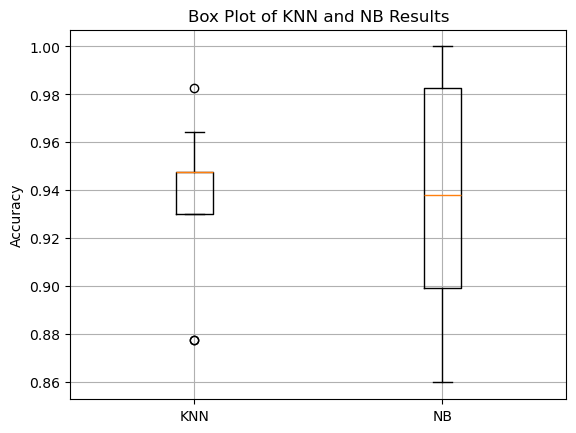

In [29]:
# Make a boxplot of the accuracy scores. (Use plt.boxplot). 
# Is there a clear difference between the models?
plt.boxplot([knn_accuracies, nb_accuracies], labels=["KNN", "NB"])

plt.title("Box Plot of KNN and NB Results")
plt.ylabel("Accuracy")
plt.grid(True)

plt.show()

In [30]:
# Perform a paired t-test (you can use the function scipy.stats.ttest_rel). 
# What do you conclude about the performance of the two models?

# GPT:
import scipy.stats as stats
t_stat, p_value = stats.ttest_rel(knn_accuracies, nb_accuracies)

# 输出 t-统计量和 p-值
print("t-statistic:", t_stat)
print("p-value:", p_value)

# 结论
if p_value < 0.05:
    print("有统计学显著性差异，模型性能不相同。")
else:
    print("没有统计学显著性差异，模型性能相似。")

t-statistic: -0.30648784901678067
p-value: 0.7662052127501802
没有统计学显著性差异，模型性能相似。


## Linear Regression
In linear regression we make the assumption that the data $(x_i, y_i)$ can be modelled by a function of the form
$$ \hat{y_i} = f(\vec{x}_i)= \sum_j a_j x_{ij}  + b_i$$

Recall that we can express this in a matrix format by:
$$ \hat{\vec{y}} = f(X)= X\Theta$$

where 
$$ X=\begin{pmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,n} &1 \\
\vdots & \vdots & \ldots & \vdots & \vdots \\
x_{N,1} & x_{N,2} & \ldots & x_{N,n} & 1
\end{pmatrix}, \quad \vec{y}=\begin{pmatrix} y_1 \\ \vdots \\y_N \end{pmatrix}, \quad \Theta=\begin{pmatrix} a_1 \\ \vdots \\a_n\\b \end{pmatrix}$$

We saw in lectures that the optimal value of $\Theta$ is given by setting
$$ \Theta = (X^T X)^{-1} X^T \vec{y}$$

The quantity $(X^T X)^{-1} X^T$ is called the psuedoinverse of X, and can be computed using the function `np.linalg.pinv`.

We will (a) perform a linear regression on the diabetes dataset. You can load this dataset using the function `load_diabetes` from `sklearn.datasets`. (b) compute the mean squared error and the R^2, and (c) compare your results with the built in function in sklearn (`sklearn.linear_model.LinearRegresion()`). You should get the same results.

In [32]:
# import statments here
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Part (a) Implementing linear regression

In [34]:
# Load the diabetes dataset 
from sklearn import datasets
all_data = datasets.load_diabetes()
X = all_data.data
# print(X[:2])
Y = all_data.target
# Split the dataset into training and test, using test_size=0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 68)

In [35]:
# Add a column of ones to Xtrain and Xtest for the intercept term
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [36]:
# Calculate the value of the coefficients theta. You can use the function np.linalg.pinv
theta = np.dot(np.linalg.pinv(X_train), Y_train)
print("Coefficients: ", theta)

Coefficients:  [ 151.43616137   -4.42442391 -204.36189004  545.55686887  312.84529462
 -807.40044915  451.56890789   85.51669278  163.09124544  746.74142885
   72.65567842]


## Part (b) Computing performance metrics

In [38]:
# Make a prediction on the test set by applying the coefficients theta to the test set
Y_pred = np.dot(X_test, theta)

In [39]:
# Calculate the mean squared error and the R^2. 
# You can use the built in functions from sklearn
manual_mse = mean_squared_error(Y_test, Y_pred)
print("Manual - Mean Squared Error: ", manual_mse)

r2 = r2_score(Y_test, Y_pred)
print("R^2 Score: ", r2)

Manual - Mean Squared Error:  2275.532188270716
R^2 Score:  0.5486367828651835


## Part (c) Checking results
Compare your results with the built in function `sklearn.linear_model.LinearRegression()`

In [41]:
# Instantiate the linear regression
from sklearn.linear_model import LinearRegression

my_model = LinearRegression()  # 括号

In [42]:
# Fit the model and make a prediction on the test set. Compare with your implementation
# X_train, X_test, Y_train, Y_test
my_model.fit(X_train, Y_train)
Y_pred_sklearn = my_model.predict(X_test)
sklearn_mse = mean_squared_error(Y_test, Y_pred_sklearn)
print("Sklearn - Mean Squared Error", sklearn_mse)

Sklearn - Mean Squared Error 2275.5321882707144


Visualise the perfomance of the regression by plotting your predicted values vs target values on a scatter plot, and drawing a line y=x. If all predictions were perfect, the predicted values would lie on the line.

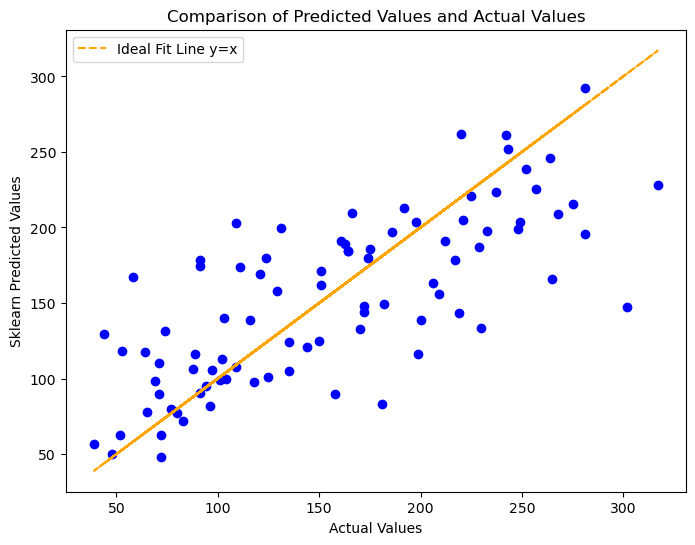

In [44]:
plt.figure(figsize=(8, 6))

# 绘制散点图: 实际值 vs 预测值
plt.scatter(Y_test, Y_pred_sklearn, color = "blue")

# 计算绘制 y=x 线需要的值
plt.plot(Y_test, Y_test, color = "orange", linestyle = "--", label = "Ideal Fit Line y=x")

plt.title("Comparison of Predicted Values and Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Sklearn Predicted Values")
plt.legend()
plt.show()

# (Optional) Polynomial regression
The term 'linear' in linear regression refers only to the coefficients $\theta$. We can in fact compute polynomial terms in the data and perform linear regression over this extended dataset to get a better fit to the data.

To compute polynomial terms in the data automatically, you can use the class `sklearn.preprocessing.PolynomialFeatures`. To find out how to use it, look at the guidance (you can type `help(PolynomialFeatures)` once you have imported it).

The following small dataset (in the cell below) gives a relationship between temperature and yield for an experiment. Use cross-validation to select the degree of the polynomial that best fits this data.

Plot the mean squared error against degree on the training set and on the validation set. Which degree of polynomial best fits this data?